#### Libraries

In [1]:
import yfinance as yfinance
import matplotlib.pyplot as plt

# ! pip install statsmodels -q
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

#### Load Time Series Data

In [2]:
stock_data = yfinance.download('AAPL', start='2024-01-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.734970,187.521323,182.993502,186.237603,82488700
2024-01-03,183.351746,184.973804,182.535736,183.321893,58414500
2024-01-04,181.023163,182.197403,179.998185,181.261983,71983600
2024-01-05,180.296722,181.869022,179.291652,181.102786,62303300
2024-01-08,184.655365,184.695178,180.615161,181.202281,59144500


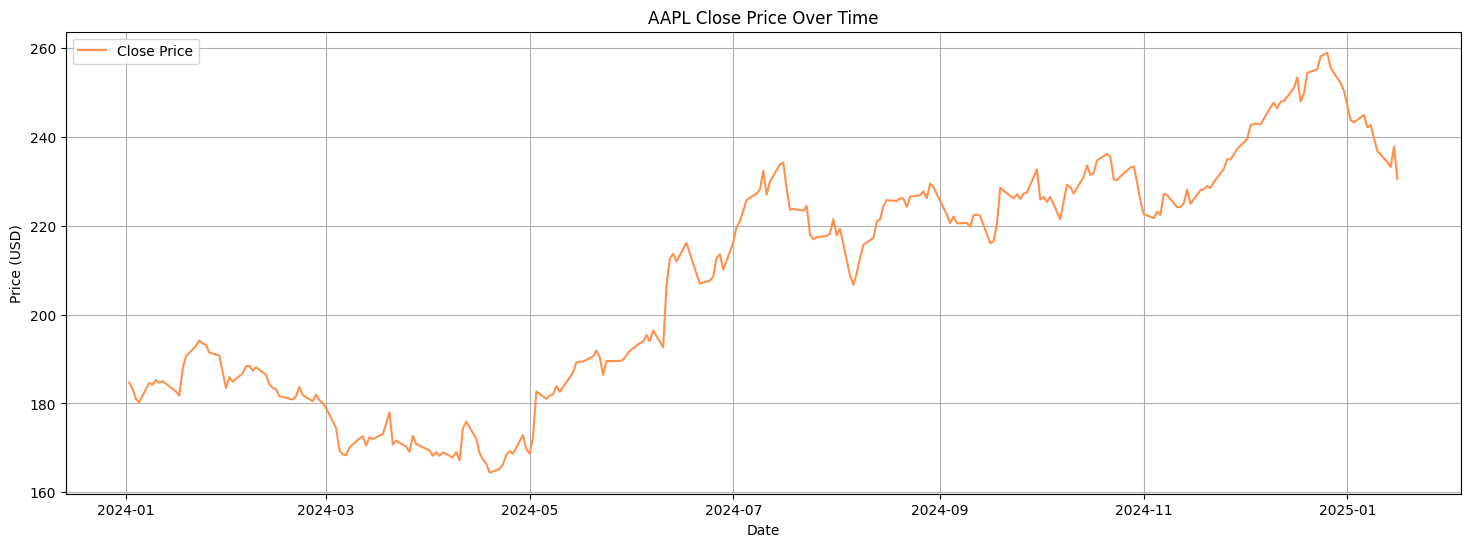

In [3]:
plt.figure(figsize=(18, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color = '#FF914D')
plt.title('AAPL Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

#### Classic Time Series Decomposition

In [4]:
decomposition_additive = seasonal_decompose(stock_data['Close'], model = 'additive', period=30)
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

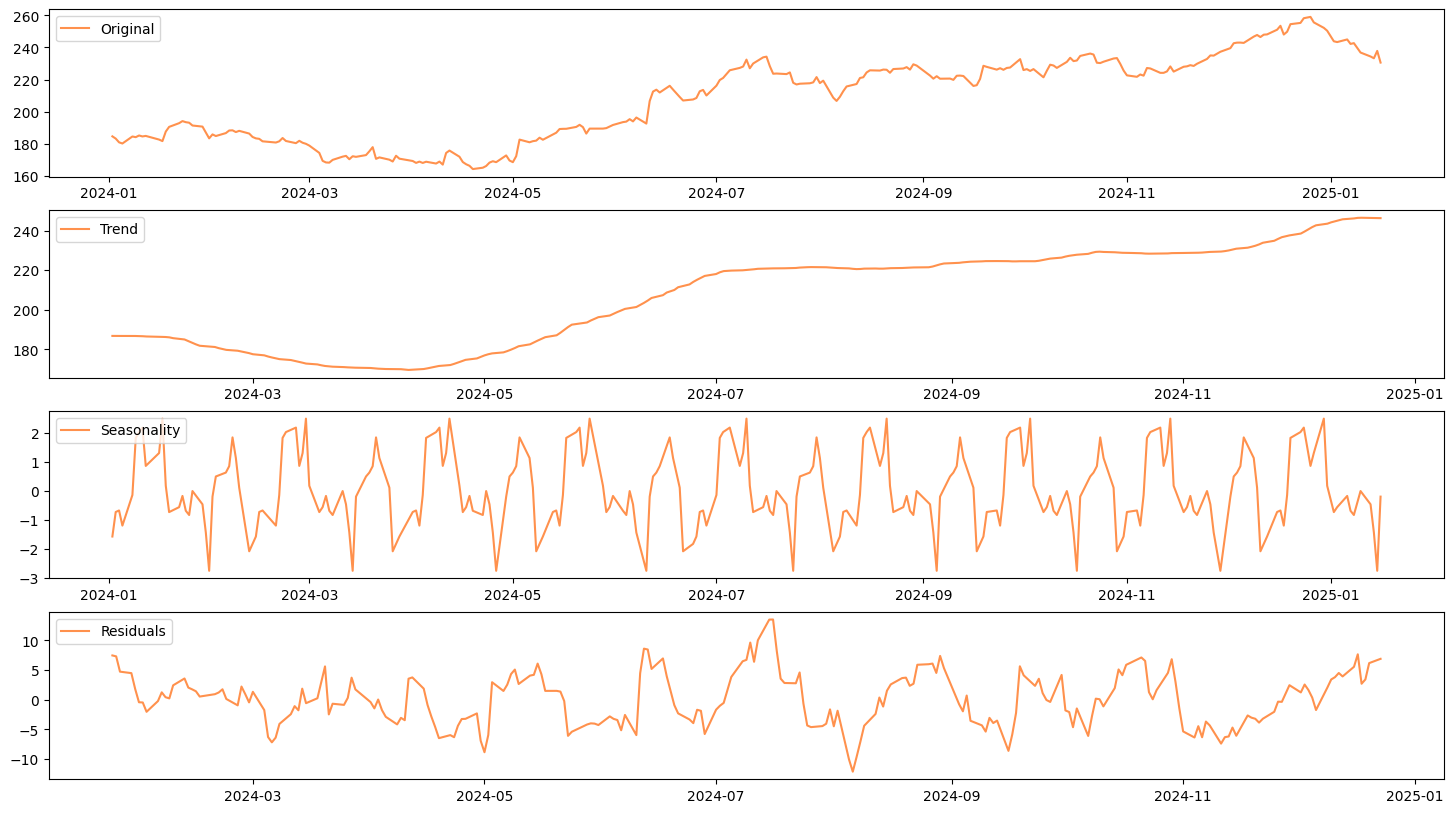

In [5]:
plt.figure(figsize=(18,10))

plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color = '#FF914D')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend_additive, label='Trend', color = '#FF914D')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonality', color = '#FF914D')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual_additive, label='Residuals', color = '#FF914D')
plt.legend(loc='upper left')

plt.show()

#### STL Decomposition

In [6]:
stl = STL(stock_data['Close'], period = 30)
result = stl.fit()

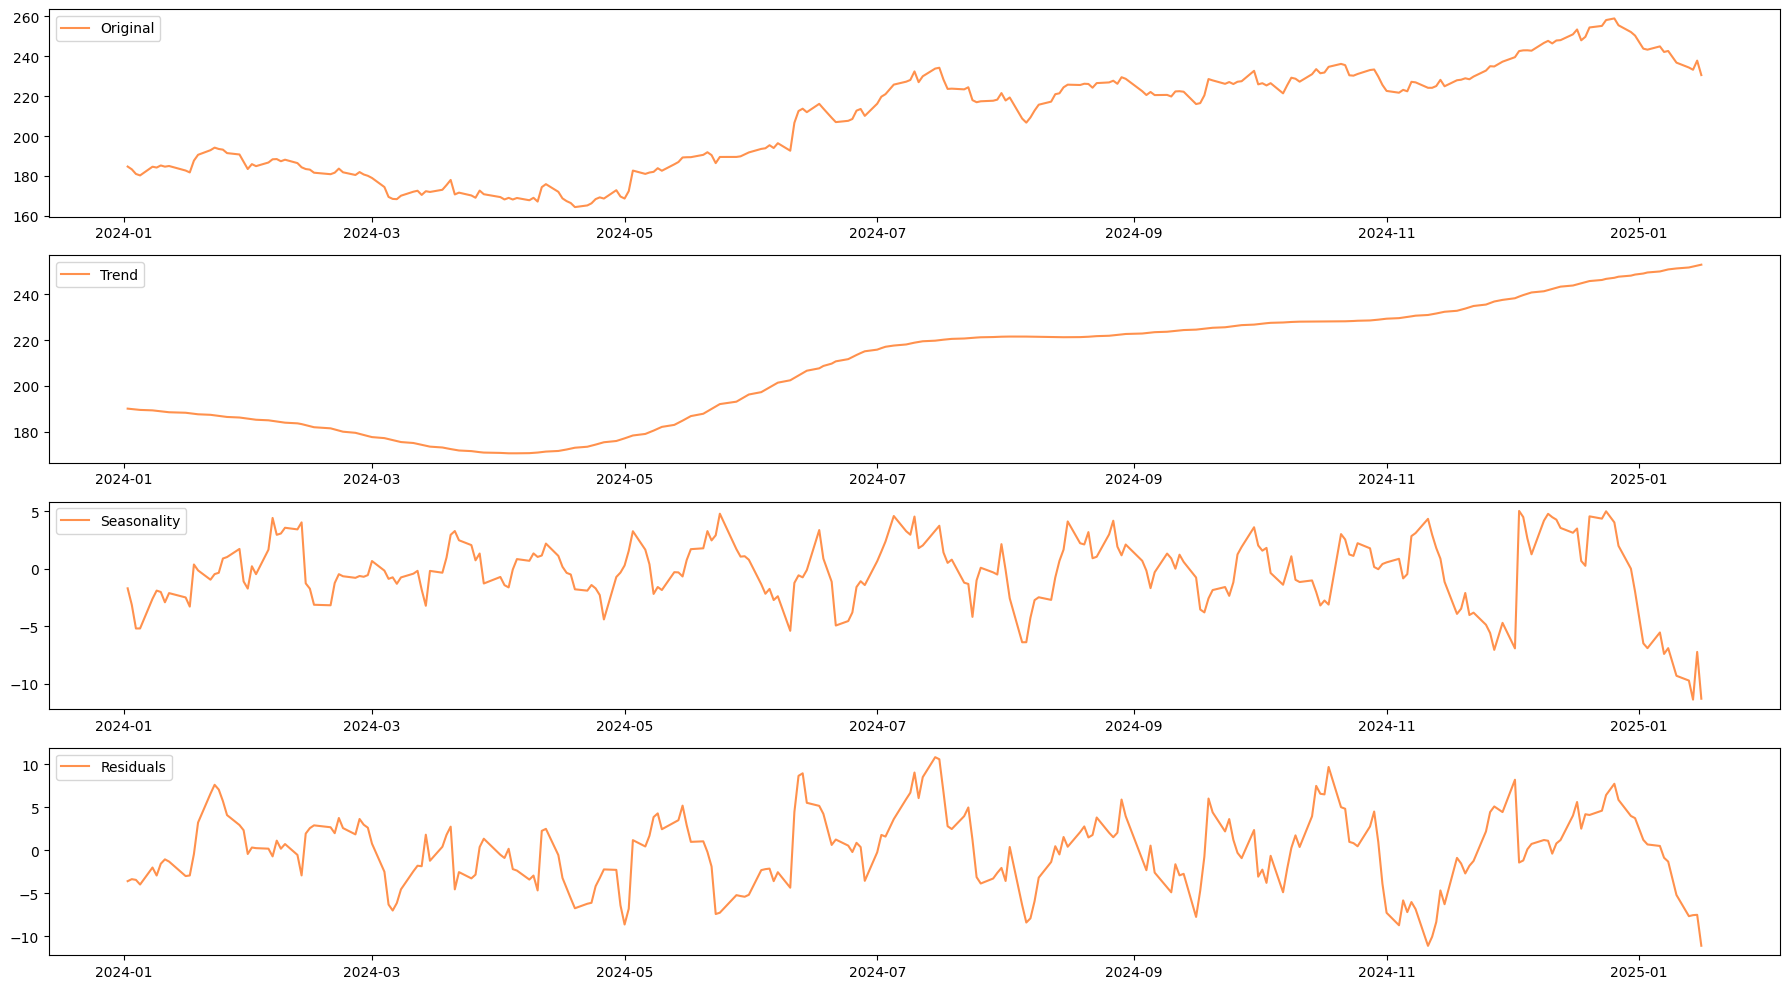

In [7]:
plt.figure(figsize=(18,10))

plt.subplot(411)
plt.plot(result.observed, label = 'Original', color = '#FF914D')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label = 'Trend', color = '#FF914D')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label = 'Seasonality', color = '#FF914D')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label = 'Residuals', color = '#FF914D')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()